In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_dir = './PetImages/train'
test_dir='./PetImages/test'

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [15]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


In [16]:
from tensorflow import keras

In [17]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

2022-08-18 11:03:23.917639: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-18 11:03:23.918411: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [18]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
#ImageData Generator를 사용하는 경우 fit()이 아니라 fit_generator()를 사용
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=10, validation_data=test_generator, validation_steps=5)

Epoch 1/10
100/100 [==============================] - 76s 756ms/step - loss: 0.8108 - accuracy: 0.5520 - val_loss: 0.6794 - val_accuracy: 0.6300
Epoch 2/10
100/100 [==============================] - 76s 763ms/step - loss: 0.6716 - accuracy: 0.6025 - val_loss: 0.6538 - val_accuracy: 0.5800
Epoch 3/10
100/100 [==============================] - 74s 739ms/step - loss: 0.6328 - accuracy: 0.6560 - val_loss: 0.5736 - val_accuracy: 0.7100
Epoch 4/10
100/100 [==============================] - 74s 740ms/step - loss: 0.5927 - accuracy: 0.7065 - val_loss: 0.6389 - val_accuracy: 0.6600
Epoch 5/10
100/100 [==============================] - 74s 739ms/step - loss: 0.5872 - accuracy: 0.6840 - val_loss: 0.5979 - val_accuracy: 0.6600
Epoch 6/10
100/100 [==============================] - 73s 731ms/step - loss: 0.5535 - accuracy: 0.7180 - val_loss: 0.6411 - val_accuracy: 0.6700
Epoch 7/10
100/100 [==============================] - 73s 730ms/step - loss: 0.5287 - accuracy: 0.7300 - val_loss: 0.5845 - val_ac

In [20]:
model.save('dog_cat_model.h5')

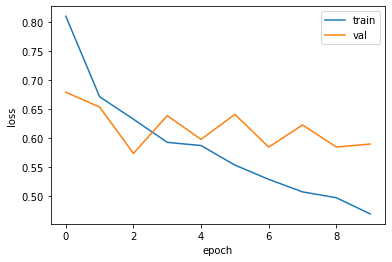

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [23]:
model.evaluate(test_generator)

10/10 [==============================] - 4s 405ms/step - loss: 0.5851 - accuracy: 0.7450


[0.5851174741983414, 0.745]

In [25]:
model2 = keras.Sequential()

model2.add(keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(128,128,3)))
model2.add(keras.layers.MaxPooling2D(2,2))
model2.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model2.add(keras.layers.MaxPooling2D(2,2))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(units=512, activation='relu'))
model2.add(keras.layers.Dense(units=1, activation='sigmoid'))

model2.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('bog-cat-model_best.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history2 = model2.fit_generator(train_generator, steps_per_epoch=100, epochs=20, validation_data=test_generator, validation_steps=10, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
100/100 [==============================] - 75s 748ms/step - loss: 0.7575 - accuracy: 0.5870 - val_loss: 0.6668 - val_accuracy: 0.6200
Epoch 2/20
100/100 [==============================] - 75s 754ms/step - loss: 0.6384 - accuracy: 0.6430 - val_loss: 0.7006 - val_accuracy: 0.5500
Epoch 3/20
100/100 [==============================] - 74s 742ms/step - loss: 0.6304 - accuracy: 0.6645 - val_loss: 0.6224 - val_accuracy: 0.6500
Epoch 4/20
100/100 [==============================] - 73s 726ms/step - loss: 0.6068 - accuracy: 0.6730 - val_loss: 0.6641 - val_accuracy: 0.6300
Epoch 5/20
100/100 [==============================] - 73s 727ms/step - loss: 0.5858 - accuracy: 0.7025 - val_loss: 0.6638 - val_accuracy: 0.6300
Epoch 6/20
100/100 [==============================] - 74s 743ms/step - loss: 0.5587 - accuracy: 0.7105 - val_loss: 0.5973 - val_accuracy: 0.7100
Epoch 7/20
100/100 [==============================] - 75s 750ms/step - loss: 0.5191 - accuracy: 0.7545 - val_loss: 0.5818 - val_ac

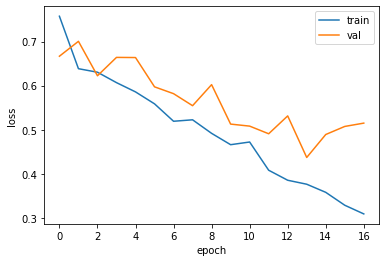

In [26]:
import matplotlib.pyplot as plt

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [27]:
model2.evaluate(test_generator)

10/10 [==============================] - 4s 390ms/step - loss: 0.6046 - accuracy: 0.7400


[0.6046300947666168, 0.74]